# **Projekt Maschinelles Lernen**

Autoren:

## Trainingsdaten laden

In [1]:
import pandas as pd
import sklearn
print("Pandas Version:", pd.__version__, "\nSklearn Version:", sklearn.__version__)

pd.options.mode.chained_assignment = None # Einige False-Positive-Warnungen werden unterdrückt

Pandas Version: 1.4.1 
Sklearn Version: 1.0.2


In [2]:
df = pd.read_csv('train.csv', sep=';')  # Trennzeichen (;) muss angegeben werden durch den Parameter sep
df.head()

,transactionId,basket,customerType,totalAmount,returnLabel
0,9534310106,"[4, 3, 4]",new,252.0,1
1,7202594767,"[4, 2, 0, 2, 5]",existing,70.0,0
2,2737331698,[5],existing,84.0,0
3,4868011733,"[1, 4, 2, 4]",existing,116.0,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",existing,378.0,0


In [3]:
print("Anzahl Zeilen: " + str(len(df)))

Anzahl Zeilen: 22400


## Exploratory Data Analysis

### Histogramme

<AxesSubplot:>

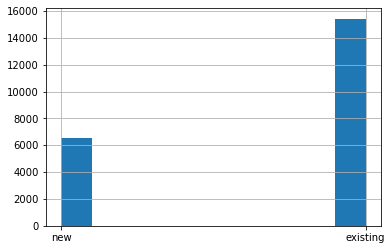

In [4]:
df['customerType'].hist()

<AxesSubplot:>

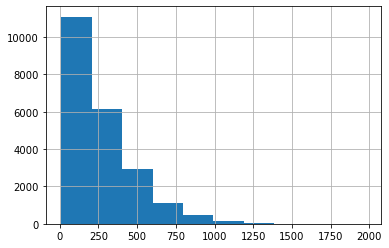

In [5]:
df['totalAmount'].hist()

Verteilung von `ReturnLabel` über alle Daten

<AxesSubplot:>

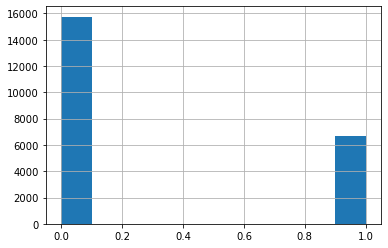

In [6]:
df['returnLabel'].hist()

Verteilung von `returnLabel` in Abhängigkeit zu allen Ausprägungen von `customerType`

In [7]:
customerTypeValues = df['customerType'].unique()
print('Values used for "customerType":')
for v in customerTypeValues:
    print(v, end=", ")

Values used for "customerType":
new, existing, nan, 

<AxesSubplot:>

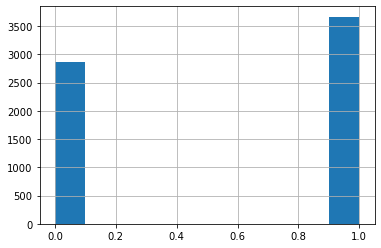

In [8]:
df_new = df[df['customerType'] == 'new']
df_new['returnLabel'].hist()

<AxesSubplot:>

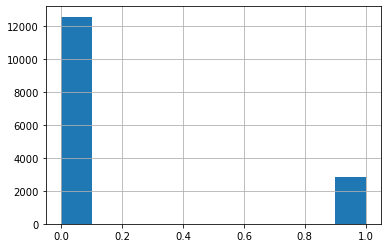

In [9]:
df_existing = df[df['customerType'] == 'existing']
df_existing['returnLabel'].hist()

<AxesSubplot:>

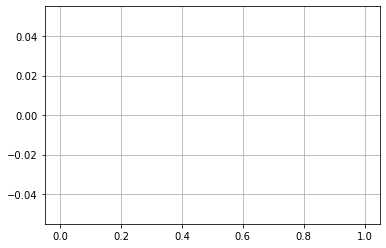

In [10]:
df_nan = df[df['customerType'] == 'nan']
df_nan['returnLabel'].hist()
# TODO Histogramm mit nan überhaupt nötig? None und '' geben das gleiche Histogramm aus

Boxplot für `totalAmount` in Abhängigkeit von `returnLabel`

<AxesSubplot:title={'center':'totalAmount'}, xlabel='returnLabel'>

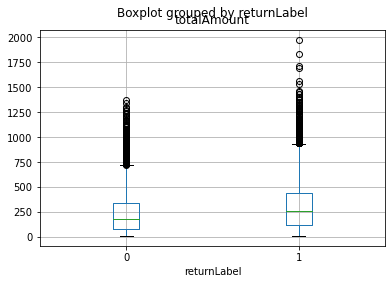

In [11]:
df.boxplot(by='returnLabel', column='totalAmount')

Displot für `totalAmount` in Abhängigkeit von `returnLabel`

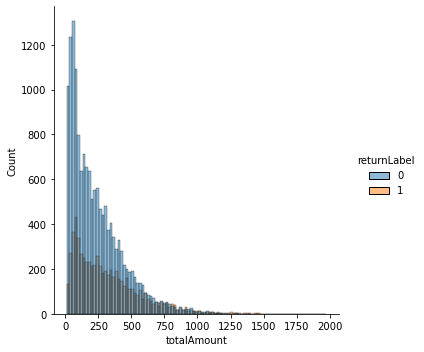

In [12]:
import seaborn as sns
sns.displot(df, x='totalAmount', hue='returnLabel')

# Bearbeitung der Trainingsdaten

## Null-Werte in den Trainingsdaten

In [13]:
df.isna().sum()

transactionId      0
basket             0
customerType     442
totalAmount      477
returnLabel        0
dtype: int64

Auffüllen der Null-Werte in der Spalte `totalAmount` und Entfernen der restlichen Zeilen mit Null-Werten

In [14]:
avg_amount = df['totalAmount'].mean()
df['totalAmount'] = df['totalAmount'].fillna(avg_amount)
df = df.dropna()
print(df.isna().sum())
print("Durchschnittlicher Gesamtpreis: " + str(avg_amount) + "\nAnzahl Zeilen: " + str(len(df)))

transactionId    0
basket           0
customerType     0
totalAmount      0
returnLabel      0
dtype: int64
Durchschnittlicher Gesamtpreis: 259.05601423162886
Anzahl Zeilen: 21958


One-Hot Encoding des kategorischen Feature `customerType`

In [15]:
df = pd.get_dummies(df, columns=['customerType'])
df.head()

,transactionId,basket,totalAmount,returnLabel,customerType_existing,customerType_new
0,9534310106,"[4, 3, 4]",252.0,1,0,1
1,7202594767,"[4, 2, 0, 2, 5]",70.0,0,1,0
2,2737331698,[5],84.0,0,1,0
3,4868011733,"[1, 4, 2, 4]",116.0,0,1,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",378.0,0,1,0


Transformation von `basket`

Kategorien von `basket`:
- Wie oft kommt jede Kategorie im `basket` vor?
- Anzahl Bücher im `basket`?
- Kommt eine Kategorie vor? noch nicht implementiert
- Kommt eine Kategorie mehrmals vor? noch nicht implementiert

Anzahl Bücher im `basket` (`basket_size`):

In [16]:
df.head()

,transactionId,basket,totalAmount,returnLabel,customerType_existing,customerType_new
0,9534310106,"[4, 3, 4]",252.0,1,0,1
1,7202594767,"[4, 2, 0, 2, 5]",70.0,0,1,0
2,2737331698,[5],84.0,0,1,0
3,4868011733,"[1, 4, 2, 4]",116.0,0,1,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",378.0,0,1,0


Wie oft kommt eine Kategorie im `basket` vor?

In [17]:
for i in range(6):
    df.insert(loc=3+i, column='basket_' + str(i), value=0)
for i in range(len(df['basket'])):
    df['basket_0'].iloc[i] = df['basket'].iloc[i].count('0')
    df['basket_1'].iloc[i] = df['basket'].iloc[i].count('1')
    df['basket_2'].iloc[i] = df['basket'].iloc[i].count('2')
    df['basket_3'].iloc[i] = df['basket'].iloc[i].count('3')
    df['basket_4'].iloc[i] = df['basket'].iloc[i].count('4')
    df['basket_5'].iloc[i] = df['basket'].iloc[i].count('5')
df.head()

,transactionId,basket,totalAmount,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5,returnLabel,customerType_existing,customerType_new
0,9534310106,"[4, 3, 4]",252.0,0,0,0,1,2,0,1,0,1
1,7202594767,"[4, 2, 0, 2, 5]",70.0,1,0,2,0,1,1,0,1,0
2,2737331698,[5],84.0,0,0,0,0,0,1,0,1,0
3,4868011733,"[1, 4, 2, 4]",116.0,0,1,1,0,2,0,0,1,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",378.0,1,0,3,2,0,1,0,1,0


**Entfernen des Labels und vom Basket**

In [18]:
df_label = df['returnLabel']
df = df.drop(columns=['basket', 'returnLabel'])
df.head()

,transactionId,totalAmount,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5,customerType_existing,customerType_new
0,9534310106,252.0,0,0,0,1,2,0,0,1
1,7202594767,70.0,1,0,2,0,1,1,1,0
2,2737331698,84.0,0,0,0,0,0,1,1,0
3,4868011733,116.0,0,1,1,0,2,0,1,0
4,7622406570,378.0,1,0,3,2,0,1,1,0


Skalieren des Trainingsdatensatzes mit einem `StandardScaler`

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df)
df_scaled = scaler.transform(df)
df_scaled

array([[ 1.55775697, -0.03362639, -0.7716456 , ..., -0.64499938,
        -1.53675125,  1.53675125],
       [ 0.65856335, -0.87908276,  0.38540125, ...,  0.52510111,
         0.6507234 , -0.6507234 ],
       [-1.06340332, -0.81404765, -0.7716456 , ...,  0.52510111,
         0.6507234 , -0.6507234 ],
       ...,
       [-1.50569248, -0.04756248,  0.38540125, ..., -0.64499938,
        -1.53675125,  1.53675125],
       [-1.42448896, -0.83262911,  0.38540125, ...,  2.86530209,
         0.6507234 , -0.6507234 ],
       [ 1.70018512,  1.08126112,  0.38540125, ..., -0.64499938,
        -1.53675125,  1.53675125]])

## Testdatensatz

Laden des Testdatensatzes

In [20]:
df_test = pd.read_csv('test.csv', sep=';')
df_test.head()

,transactionId,basket,customerType,totalAmount,returnLabel
0,4132523932,"[4, 3, 4, 3, 2, 3]",existing,366.0,1
1,8998574539,"[3, 4, 4, 3, 5]",existing,85.0,0
2,9346688547,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]",existing,275.0,0
3,4533897707,"[3, 2, 2, 1, 5, 1, 1, 0]",existing,528.0,0
4,3334800500,"[4, 2, 3, 5, 2, 5, 1]",existing,287.0,0


Null-Werte im Testdatensatz

In [21]:
df_test.isna().sum()

transactionId      0
basket             0
customerType     203
totalAmount      175
returnLabel        0
dtype: int64

Auffüllen der Null-Werte in `totalAmount` und Entfernen des Rests (`customerType`)

In [22]:
avg_amount = df_test['totalAmount'].mean()
df_test['totalAmount'] = df_test['totalAmount'].fillna(avg_amount)
df_test = df_test.dropna()
print(df_test.isna().sum())
print("Durchschnittlicher Gesamtpreis: " + str(avg_amount) + "\nAnzahl Zeilen: " + str(len(df_test)))

transactionId    0
basket           0
customerType     0
totalAmount      0
returnLabel      0
dtype: int64
Durchschnittlicher Gesamtpreis: 263.1954376657825
Anzahl Zeilen: 9397


Transformation des Testdatensatzes analog Trainingsdatensatz (One-Hot-Encoding von `customerType` & Basket-Features)

In [23]:
df_test = pd.get_dummies(df_test, columns=['customerType'])
for i in range(6):
    df_test.insert(loc=3+i, column='basket_' + str(i), value=0)
for i in range(len(df_test['basket'])):
    df_test['basket_0'].iloc[i] = df_test['basket'].iloc[i].count('0')
    df_test['basket_1'].iloc[i] = df_test['basket'].iloc[i].count('1')
    df_test['basket_2'].iloc[i] = df_test['basket'].iloc[i].count('2')
    df_test['basket_3'].iloc[i] = df_test['basket'].iloc[i].count('3')
    df_test['basket_4'].iloc[i] = df_test['basket'].iloc[i].count('4')
    df_test['basket_5'].iloc[i] = df_test['basket'].iloc[i].count('5')
df_test.head()

,transactionId,basket,totalAmount,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5,returnLabel,customerType_existing,customerType_new
0,4132523932,"[4, 3, 4, 3, 2, 3]",366.0,0,0,1,3,2,0,1,1,0
1,8998574539,"[3, 4, 4, 3, 5]",85.0,0,0,0,2,2,1,0,1,0
2,9346688547,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]",275.0,1,4,2,2,2,0,0,1,0
3,4533897707,"[3, 2, 2, 1, 5, 1, 1, 0]",528.0,1,3,2,1,0,1,0,1,0
4,3334800500,"[4, 2, 3, 5, 2, 5, 1]",287.0,0,1,2,1,1,2,0,1,0


Aufteilen des Trainingsdatensatzes in Label und restliche Features

In [24]:
df_test_label = df_test['returnLabel']
df_test = df_test.drop(columns=['basket', 'returnLabel'])

Skalieren des Testdatensatzes

In [25]:
df_test_scaled = scaler.transform(df_test)
df_test_scaled

array([[-0.52536681,  0.49594518, -0.7716456 , ..., -0.64499938,
         0.6507234 , -0.6507234 ],
       [ 1.351158  , -0.80940229, -0.7716456 , ...,  0.52510111,
         0.6507234 , -0.6507234 ],
       [ 1.48540333,  0.073217  ,  0.38540125, ..., -0.64499938,
         0.6507234 , -0.6507234 ],
       ...,
       [-1.04789114, -0.61894234, -0.7716456 , ..., -0.64499938,
         0.6507234 , -0.6507234 ],
       [ 0.65959745, -0.87908276,  1.54244811, ...,  0.52510111,
         0.6507234 , -0.6507234 ],
       [-1.20998772, -0.5446165 , -0.7716456 , ..., -0.64499938,
         0.6507234 , -0.6507234 ]])

# Trainieren der Modelle

## Modell 1: Logistische Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as MSE, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
candidates = [{'C': [0.1, 1, 4, 5, 6, 10, 30, 100], 'penalty': ['l1', 'l2']}]
model_no_cv = LogisticRegression(solver='saga', random_state=0)
model = GridSearchCV(estimator=model_no_cv, param_grid=candidates, n_jobs=-1)
model.fit(df_scaled, df_label)
print("Bestes C:", model.best_estimator_.C,
"\nBeste penalty:", model.best_estimator_.penalty,
"\nBester Score:", model.best_score_)

Bestes C: 1 
Beste penalty: l1 
Bester Score: 0.8791326873688895


c:\Users\alexa\anaconda3\envs\ml-course\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Vorhersagen der logistischen Regression

In [27]:
print("Länge der Testdaten:", len(df_test_scaled), "(Features) /", len(df_test_label), "(Label)")

Länge der Testdaten: 9397 (Features) / 9397 (Label)


In [28]:
predictions = model.predict(df_test_scaled)
print("Accuracy:", accuracy_score(df_test_label, predictions),
"\nPrecision:", precision_score(df_test_label, predictions),
"\nRecall:", recall_score(df_test_label, predictions),
"\nF1-Score:", f1_score(df_test_label, predictions),
"\nMean Squared Error:", MSE(df_test_label, predictions))

Accuracy: 0.873151005640098 
Precision: 0.8172888015717092 
Recall: 0.7410046312789454 
F1-Score: 0.7772795216741405 
Mean Squared Error: 0.1268489943599021


Accuracy auf den Trainingsdaten

In [29]:
predictions = model.predict(df_scaled)
print("Accuracy:", accuracy_score(df_label, predictions))

Accuracy: 0.8794061389926223


# 2. Modell: Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
candidates = [{'n_estimators': [60, 80, 100, 120, 140]}, {'max_depth': [2, 4, 6]}]
model = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=candidates, n_jobs=-1)
model.fit(df_scaled, df_label)

GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid=[{'n_estimators': [60, 80, 100, 120, 140]},
                         {'max_depth': [2, 4, 6]}])

Beste Hyperparameter

In [31]:
print("Bester Wert für n_estimators:", model.best_estimator_.n_estimators,
"\nBester Wert für max_depth:", model.best_estimator_.max_depth,
"\nBester Score:", model.best_score_)

Bester Wert für n_estimators: 100 
Bester Wert für max_depth: 6 
Bester Score: 0.8685216677265428


Vorhersagen mit dem Random Forest

In [32]:
predictions = model.predict(df_test_scaled)
print("Accuracy:", accuracy_score(df_test_label, predictions),
"\nPrecision:", precision_score(df_test_label, predictions),
"\nRecall:", recall_score(df_test_label, predictions),
"\nF1-Score:", f1_score(df_test_label, predictions),
"\nMean Squared Error:", MSE(df_test_label, predictions))
predictions = model.predict(df_scaled)
print("\nAccuracy auf den Trainingsdaten:", accuracy_score(df_label, predictions))

Accuracy: 0.8610194743003086 
Precision: 0.7981724274930473 
Recall: 0.71571072319202 
F1-Score: 0.7546957175056348 
Mean Squared Error: 0.13898052569969138

Accuracy auf den Trainingsdaten: 0.8728937061663176


# 3. Gradient Boosting Tree

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
model = GridSearchCV(estimator=GradientBoostingClassifier(max_depth=2,random_state=0), n_jobs=-1, param_grid=candidates)
model.fit(df_scaled, df_label)

GridSearchCV(estimator=GradientBoostingClassifier(max_depth=2, random_state=0),
             n_jobs=-1,
             param_grid=[{'n_estimators': [60, 80, 100, 120, 140]},
                         {'max_depth': [2, 4, 6]}])

Beste Hyperparameter

In [34]:
print("Bester Wert für n_estimators:", model.best_estimator_.n_estimators,
"\nBester Wert für max_depth:", model.best_estimator_.max_depth,
"\nBester Score:", model.best_score_)

Bester Wert für n_estimators: 140 
Bester Wert für max_depth: 2 
Bester Score: 0.8793150959965719


Vorhersagen mit dem Gradient Boosting Tree

In [35]:
predictions = model.predict(df_test_scaled)
print("Accuracy:", accuracy_score(df_test_label, predictions),
"\nPrecision:", precision_score(df_test_label, predictions),
"\nRecall:", recall_score(df_test_label, predictions),
"\nF1-Score:", f1_score(df_test_label, predictions),
"\nMean Squared Error:", MSE(df_test_label, predictions))
predictions = model.predict(df_scaled)
print("\nAccuracy auf den Trainingsdaten:", accuracy_score(df_label, predictions))

Accuracy: 0.8727253378737895 
Precision: 0.8075601374570447 
Recall: 0.75347345920912 
F1-Score: 0.7795798009583487 
Mean Squared Error: 0.1272746621262105

Accuracy auf den Trainingsdaten: 0.8819564623371892


In [38]:
"""
 TODO Histogramm mit nan & Logistische Regression Warnung
 TODO Aufgabe 15 (Welche Werte wurden von allen Modellen falsch erkannt?)
 TODO evtl. Basketlänge & andere Features erstellen & testen
 TODO Autoren hinzufügen
 TODO Diese Zelle entfernen
"""
print(end='')